In [1]:
from google.colab import files
 
uploaded = files.upload()

Saving forestfires.csv to forestfires (1).csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

df = pd.read_csv('forestfires.csv')


In [3]:
df.head()


,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [4]:
df.shape

(517, 31)

In [5]:
df.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

<Axes: xlabel='area', ylabel='Count'>

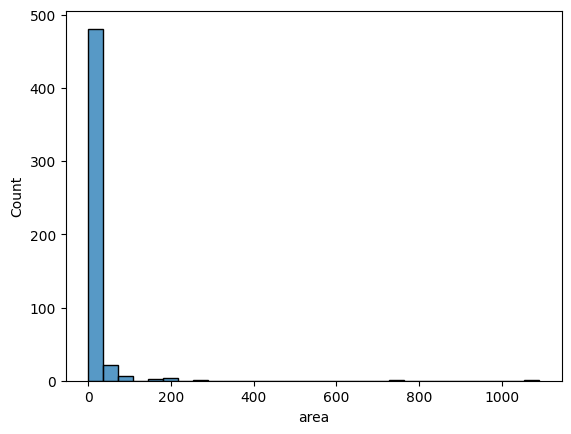

In [7]:
sns.histplot(df['area'], bins=30)


<ipython-input-8-3c53634cba3c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True,cmap='coolwarm')


<Axes: >

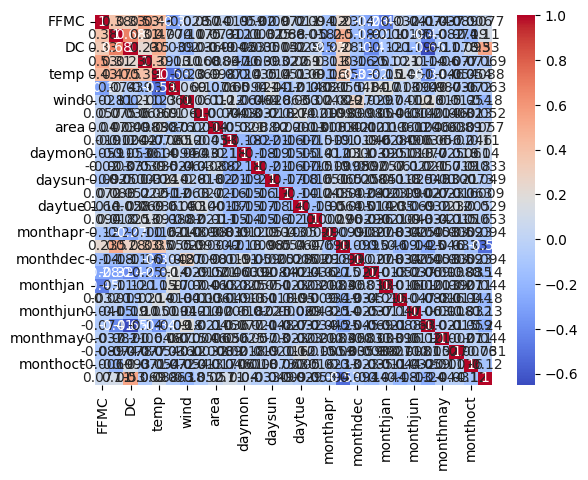

In [8]:
sns.heatmap(df.corr(), annot=True,cmap='coolwarm')

In [9]:
# Drop the 'day' and 'month' columns since they are not relevant for our analysis
df.drop(['day', 'month'], axis=1, inplace=True)

In [10]:
# Convert the 'size_category' column to binary values (0 for 'small' and 1 for 'large')
df['size_category'] = df['size_category'].map({'small': 0, 'large': 1})


In [11]:
# Split the dataset into features (X) and target (y)
X = df.drop(['area'], axis=1)
y = df['area']


In [12]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Scale the features using standardization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [14]:
# Define the neural network architecture
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(16, activation='relu'))
model.add(Dense(1))

In [15]:
# Compile the model
model.compile(loss='mse', optimizer='adam')

In [16]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)


Epoch 1/100
11/11 [==============================] - 1s 19ms/step - loss: 2606.2927 - val_loss: 635.5837
Epoch 2/100
11/11 [==============================] - 0s 4ms/step - loss: 2594.4292 - val_loss: 630.8671
Epoch 3/100
11/11 [==============================] - 0s 4ms/step - loss: 2585.7788 - val_loss: 626.0467
Epoch 4/100
11/11 [==============================] - 0s 6ms/step - loss: 2575.3003 - val_loss: 621.8860
Epoch 5/100
11/11 [==============================] - 0s 6ms/step - loss: 2566.3574 - val_loss: 616.9664
Epoch 6/100
11/11 [==============================] - 0s 5ms/step - loss: 2555.3503 - val_loss: 611.5560
Epoch 7/100
11/11 [==============================] - 0s 5ms/step - loss: 2540.7661 - val_loss: 605.9859
Epoch 8/100
11/11 [==============================] - 0s 5ms/step - loss: 2526.2607 - val_loss: 599.4002
Epoch 9/100
11/11 [==============================] - 0s 6ms/step - loss: 2510.0168 - val_loss: 592.0365
Epoch 10/100
11/11 [==============================] - 0s 6ms/st

In [20]:
# Make predictions on the test set
y_pred = model.predict(X_test)



4/4 [==============================] - 0s 3ms/step


In [19]:
y_pred

array([[ 9.4144316e+00],
       [-8.1794500e+00],
       [-6.7721496e+00],
       [-4.5310569e+00],
       [ 4.1183939e+00],
       [-1.5183315e+00],
       [ 3.2739975e+01],
       [ 4.1391518e+01],
       [-7.0310211e-01],
       [-3.3119025e+00],
       [-2.8472638e+00],
       [-4.6091664e-01],
       [-7.7348585e+00],
       [-3.5379744e-01],
       [ 1.7958217e+00],
       [-1.1693582e+01],
       [-5.2373967e+00],
       [-3.7412016e+00],
       [ 3.5082344e+01],
       [ 3.7066544e+01],
       [ 3.8777191e+01],
       [ 9.1906898e+01],
       [ 5.9039001e+00],
       [ 2.7531013e+01],
       [-4.6071143e+00],
       [ 7.8490148e+00],
       [-3.5081244e+00],
       [ 1.1047735e+01],
       [-7.9660716e+00],
       [-1.0637767e+01],
       [-4.2263761e+00],
       [ 7.4850029e+01],
       [-7.4281859e+00],
       [-2.2758581e-01],
       [-5.1635814e+00],
       [ 5.5960178e+01],
       [-4.5420175e+00],
       [ 4.7099804e+01],
       [-4.5758982e+00],
       [-7.4856477e+00],


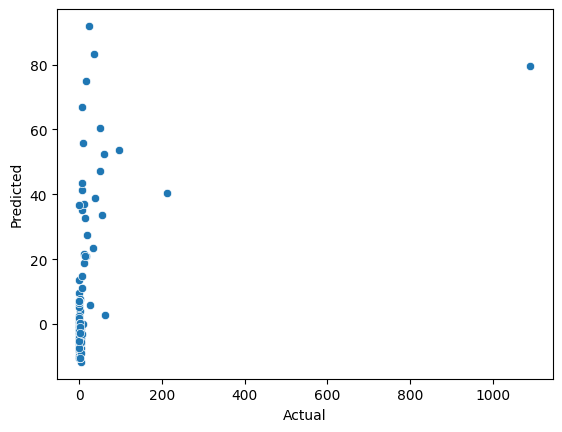

In [21]:
# Plot the actual vs predicted values
sns.scatterplot(x=y_test, y=y_pred.flatten())
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()
